<a href="https://colab.research.google.com/github/vinayvascuri/Projects/blob/main/PINTEREST_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Table of Contents](#TOC)

[Introduction](#init)

[1. Importing Libraries +Bring in Data](#initexp)

>[1.1 Importing Libraries](#initexp1)

>[1.2 Loading Data](#initexp2)

>[1.3 Description of the Dataset](#initexp3)

>[1.4 Missing values](#initexp4)

>[1.5 Total Ratings & Proportion of Ratings](#initexp5)

>[1.6 MultiLingual Reviews](#initexp6)

>[1.7 Sentiment Analysis](#initexp7)

>[1.8 Column chart - Sentiment Analysis of Reviews](#initexp8)

>[1.9 App Version Distribution Statistics](#initexp9)

>[1.10 Classify reviews by safety theme](#initexp10)

>[1.11 Summary](#initexp11)




# <a name = "init"> **Introduction**

This notebook presents an exploratory analysis of ~1.3 million user reviews from the **Pinterest application.** The goal is to extract insights related to user sentiment, app usability, content safety, and product experience by examining patterns, complaint categories, and time-version trends. This work supports Trust & Safety analytics, product feedback evaluation, and user experience improvements.

## <a name = "initexp1">1.1 Importing Libraries</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <a name = "initexp2"> 1.2 Loading Data</a>


In [3]:



#csv path
csv_path = "/content/drive/MyDrive/PINTEREST_REVIEWS.csv"

df = pd.read_csv(csv_path)



In [4]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=f746d4b5d5b986cc5ec7332f531a65d5020c89b5deeb9e13b1ecada14e99d1f3
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


## <a name = "initexp3"> 1.3 Description of Dataset

In [5]:
df.head(10) #Top 10 rows of data


,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,2cb64539-a736-4d50-8b3e-120b1a941c5a,152618553977019693742,A Google user,Yesss finally the official interest android app!,5,2,NaN,2012-08-15 02:41:03
1,1,064c13d8-e557-4cf0-b9e8-3278154c559f,234382942865437071667,A Google user,Splendid,5,1,NaN,2012-08-15 02:43:15
2,2,fa85c718-7222-4327-b7e1-811f59176820,174473604608358796368,A Google user,Coolest thing since sliced bread!!,5,0,NaN,2012-08-15 02:43:52
3,3,55d55e1c-1819-4a26-ad0b-59dd9c6e5593,286593453219054880269,A Google user,So glad we finally got a Pinterest app! Looks ...,5,7,1.0.0,2012-08-15 02:49:59
4,4,5f7f56f2-b267-4eda-ae4a-98909c530fb7,167276875678680630145,A Google user,Finally wow...thanks for finally supporting an...,5,0,NaN,2012-08-15 02:51:51
5,5,0be27e0d-ae2a-40e4-b1e3-e355e4e2239f,279544562364680964711,A Google user,Finally here!,5,0,NaN,2012-08-15 02:52:28
6,6,e6f1e3ed-6a74-49f9-b277-c969ca805afa,194594231700116278497,A Google user,Yes finally.. and works very well. Let's hope ...,5,1,NaN,2012-08-15 02:54:30
7,7,f1b88cc7-3562-446c-bd3e-8204bab38627,299572542228213240681,A Google user,Great!,4,2,1.0.0,2012-08-15 02:55:00
8,8,f2f7aa0b-9052-4378-b1a6-3f3e371a0f41,283295985056957279128,A Google user,Works brilliantly and looks beautiful.,5,0,NaN,2012-08-15 02:56:07
9,9,cb7a14e6-687c-4092-b665-8a5009b1cc02,165673340173097386145,A Google user,excited!,4,0,1.0.0,2012-08-15 02:59:03


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296547 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1296547 non-null  int64 
 1   review_id           1296547 non-null  object
 2   pseudo_author_id    1296547 non-null  object
 3   author_name         1296547 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1296547 non-null  int64 
 6   review_likes        1296547 non-null  int64 
 7   author_app_version  1016227 non-null  object
 8   review_timestamp    1296547 non-null  object
dtypes: int64(3), object(6)
memory usage: 89.0+ MB


## <a name = "initexp4"> 1.4 Missing Values

In [7]:
#Check for any missing values
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,3496
review_rating,0
review_likes,0
author_app_version,280320
review_timestamp,0


In [8]:
# Drop rows with no review_text or rating
df = df.dropna(subset=["review_text"])

In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
pseudo_author_id,0
author_name,0
review_text,0
review_rating,0
review_likes,0
author_app_version,280084
review_timestamp,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1293051 entries, 0 to 1296546
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1293051 non-null  int64 
 1   review_id           1293051 non-null  object
 2   pseudo_author_id    1293051 non-null  object
 3   author_name         1293051 non-null  object
 4   review_text         1293051 non-null  object
 5   review_rating       1293051 non-null  int64 
 6   review_likes        1293051 non-null  int64 
 7   author_app_version  1012967 non-null  object
 8   review_timestamp    1293051 non-null  object
dtypes: int64(3), object(6)
memory usage: 98.7+ MB


## <a name = "initexp5"> 1.5 Total Ratings & Proportion of Ratings

# **Total count of Ratings**


In [11]:
print(f"Total number of ratings = {df['review_rating'].count()}")


Total number of ratings = 1293051


## **Count by each rating value (1–5)**

In [12]:
df["review_rating"].value_counts()


,count
review_rating,
5,974176
4,154349
1,77440
3,55221
2,31865


# **Proportion of Ratings**

In [13]:
rating_pct = (df["review_rating"].value_counts(normalize=True) * 100).sort_index()
rating_pct = rating_pct.round(2).astype(str) + '%'
rating_pct





,proportion
review_rating,
1,5.99%
2,2.46%
3,4.27%
4,11.94%
5,75.34%


# **Pinterest is a global platform, so detecting multilingual reviews is important.**

## <a name = "initexp6"> 1.6 MultiLingual Reviews

In [14]:
# import numpy as np

# # Take a 10% sample or a fixed N rows
# sample_frac = 0.1  # 10%
# sample_df = df.sample(frac=sample_frac, random_state=42)

# from langdetect import detect, DetectorFactory
# DetectorFactory.seed = 0

# def detect_language(text):
#     try:
#         return detect(text)
#     except:
#         return "unknown"

# sample_df["language"] = sample_df["review_text"].apply(detect_language)

# # Look at distribution
# print(sample_df["language"].value_counts())




In [15]:
# # Print % distribution
# print((sample_df["language"].value_counts(normalize=True) * 100).round(2).astype(str) + '%')

## <a name = "initexp7"> 1.7 Sentiment Analysis

In [16]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    if not isinstance(text,str):
        return 0
    return sid.polarity_scores(text)["compound"]

# Calculate sentiment on full DF
df["sentiment_score"] = df["review_text"].apply(vader_sentiment)

def vader_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["sentiment_score"].apply(vader_label)

# 👇 Show first 100 rows with sentiment results
df[["review_text", "sentiment_score", "sentiment"]].head(100)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,review_text,sentiment_score,sentiment
0,Yesss finally the official interest android app!,0.5093,Positive
1,Splendid,0.5859,Positive
2,Coolest thing since sliced bread!!,0.0000,Neutral
3,So glad we finally got a Pinterest app! Looks ...,0.9166,Positive
4,Finally wow...thanks for finally supporting an...,0.4926,Positive
...,...,...,...
95,Sooooo stoked that this app is finally here! S...,0.7249,Positive
96,so nice ¡¡¡¡¡,0.4754,Positive
97,Been waiting for this app for a while now to s...,0.6486,Positive
98,Pinterest on android its about time so far fla...,0.5542,Positive


In [17]:
def smart_vader_label(text, score):
    if not isinstance(text, str):
        return "Neutral"

    t = text.lower()

    # NEGATION HANDLING
    negation_phrases = [
        "no complaints",
        "not bad",
        "no problem",
        "no issues",
        "not an issue",
        "nothing wrong",
        "nothing to complain"
    ]

    for phrase in negation_phrases:
        if phrase in t:
            return "Positive"

    # now apply regular VADER
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


# **SENTIMENT ANALYSIS OF REVIEW_TEXT**

In [18]:
sentiment = print(df["sentiment"].value_counts())
sentiment


sentiment
Positive    982667
Neutral     224622
Negative     85762
Name: count, dtype: int64


In [19]:
sentiment_percent = (df["sentiment"].value_counts(normalize=True) * 100).round(2)
sentiment_percent = sentiment_percent.astype(str) + '%'
sentiment_percent

,proportion
sentiment,
Positive,76.0%
Neutral,17.37%
Negative,6.63%


 **“Out of ~1.29M user reviews, ~85K or 6.6% were negative, while 76% were positive. Although overall sentiment is strongly positive, the negative portion still represents a significant signal source for identifying user pain-points, safety concerns, and product issues.”**

## <a name = "initexp8"> 1.8 Column chart - Sentiment Analysis of Reviews

sentiment
Positive     76.0%
Neutral     17.37%
Negative     6.63%
Name: proportion, dtype: object


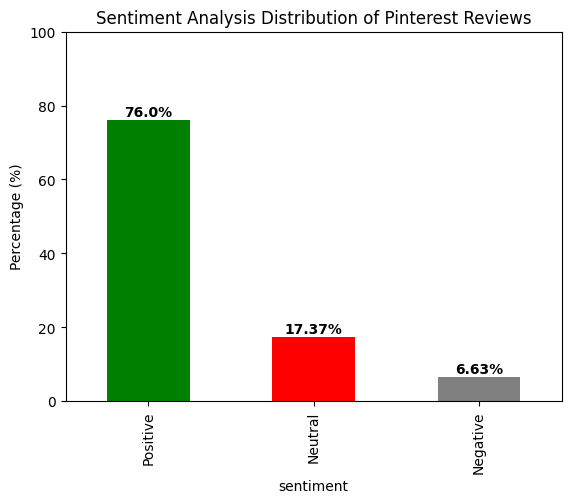

In [20]:
import matplotlib.pyplot as plt

# Compute numeric percentages
sentiment_percent = (df["sentiment"].value_counts(normalize=True) * 100).round(2)

# Print with % symbols
print(sentiment_percent.astype(str) + '%')

# Plot using numeric values
sentiment_percent.plot(kind='bar', color=['green','red','gray'])
plt.ylabel("Percentage (%)")
plt.title("Sentiment Analysis Distribution of Pinterest Reviews")
plt.ylim(0,100)

for i, v in enumerate(sentiment_percent):
    plt.text(i, v + 1, f"{v}%", ha='center', fontsize=10, fontweight='bold')

plt.show()



## <a name = "initexp9"> 1.9 App Version Distribution Statistics

In [21]:
app_version_percent = (df["author_app_version"].value_counts(normalize=True) * 100).round(2)

top25_versions = app_version_percent.head(25)

print(top25_versions.astype(str) + '%')



author_app_version
1.0.3      4.77%
6.6.0      1.08%
5.7.4      1.04%
5.3.1      1.03%
7.43.1     0.94%
7.43.0     0.92%
8.45.0      0.9%
5.22.0     0.84%
6.47.0     0.78%
6.94.0     0.68%
5.6.2      0.67%
6.5.0      0.67%
9.42.0      0.6%
3.6.2       0.6%
5.1.1      0.56%
6.10.0     0.55%
5.16.0     0.55%
7.42.0     0.54%
1.0.6      0.54%
7.25.0     0.53%
6.13.0     0.53%
7.23.0     0.53%
1.9.5      0.53%
6.7.0      0.51%
10.44.0    0.51%
Name: proportion, dtype: object


In [22]:

# =========================================================
# STEP 0 — Convert to datetime
# =========================================================
df["review_timestamp"] = pd.to_datetime(df["review_timestamp"], errors="coerce")


# =========================================================
# STEP 1 — Extract YEAR from review_timestamp
# =========================================================
df["year"] = df["review_timestamp"].dt.year

# =========================================================
# STEP 2 — Determine top 25 app versions overall
# =========================================================
top25_versions = df["author_app_version"].value_counts().head(25).index

# =========================================================
# STEP 3 — Filter dataset to only those top 25 versions
# =========================================================
df_top25 = df[df["author_app_version"].isin(top25_versions)]

# =========================================================
# STEP 4 — Compute percentage of app version usage by year
# =========================================================
app_year_pct = (df_top25.groupby(["year", "author_app_version"]).size() /
                df_top25.groupby(["year"]).size() * 100).round(2)

# =========================================================
# STEP 5 — Pivot table output (Year × App Versions)
# =========================================================
app_year_matrix = app_year_pct.unstack().fillna(0)

# DISPLAY TABLE
print("\nAPP VERSION % BY YEAR:")
print(app_year_matrix)


APP VERSION % BY YEAR:
author_app_version  1.0.3  1.0.6  1.9.5  10.44.0  3.6.2  5.1.1  5.16.0  \
year                                                                     
2012                90.08   9.92   0.00     0.00   0.00   0.00    0.00   
2013                12.41   5.50  82.09     0.00   0.00   0.00    0.00   
2014                 0.17   0.10  24.72     0.00  75.01   0.00    0.00   
2015                 0.00   0.00   5.92     0.00   0.05  23.10    0.00   
2016                 0.01   0.01   0.72     0.00   0.25   0.58   15.57   
2017                 0.00   0.01   0.24     0.00   0.09   0.17    0.56   
2018                 0.03   0.00   0.34     0.00   0.12   0.14    0.38   
2019                 0.00   0.00   0.07     0.00   0.04   0.08    0.12   
2020                 0.00   0.00   0.03     0.00   0.02   0.04    0.10   
2021                 0.00   0.00   0.02     0.00   0.02   0.01    0.02   
2022                 0.00   0.00   0.01    27.14   0.00   0.01    0.00   
2023          

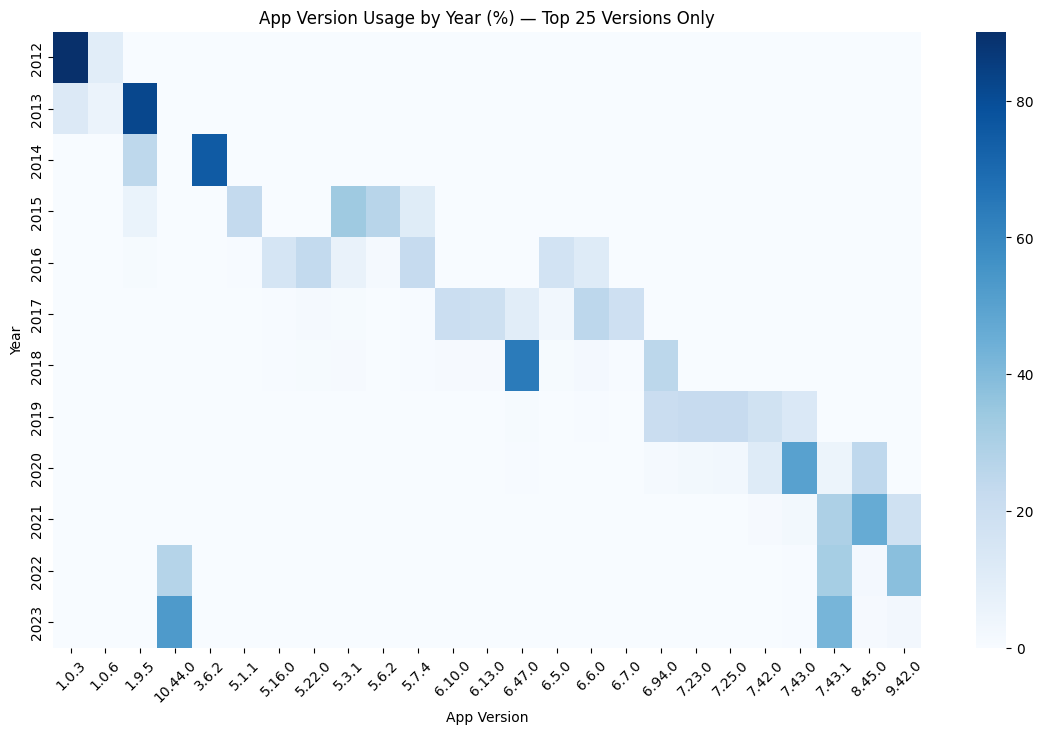

In [23]:
# =========================================================
# Heatmap visualization
# =========================================================
plt.figure(figsize=(14,8))
sns.heatmap(app_year_matrix, cmap="Blues", annot=False)
plt.title("App Version Usage by Year (%) — Top 25 Versions Only")
plt.ylabel("Year")
plt.xlabel("App Version")
plt.xticks(rotation=45)
plt.show()

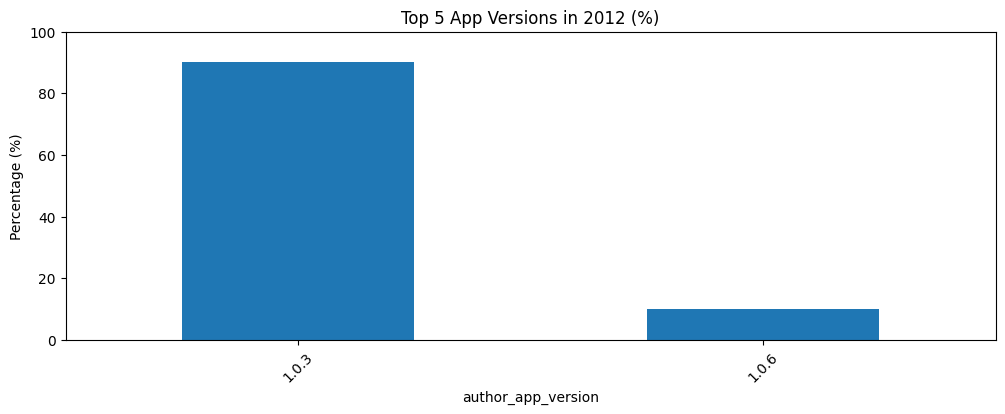

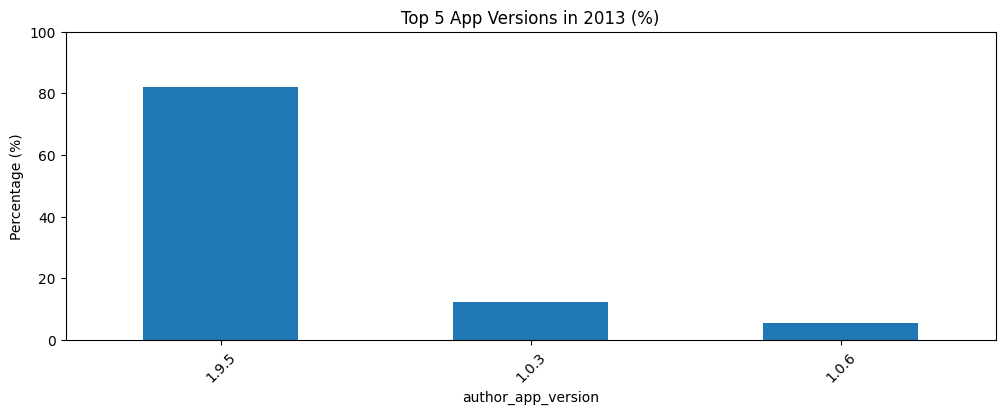

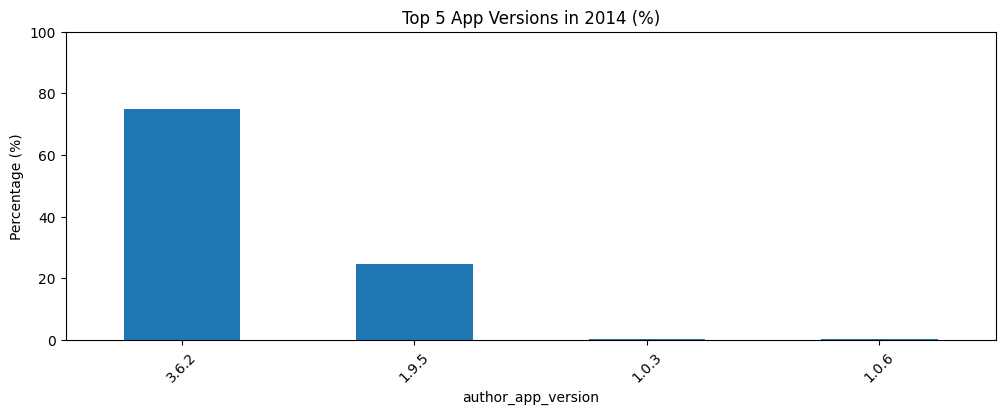

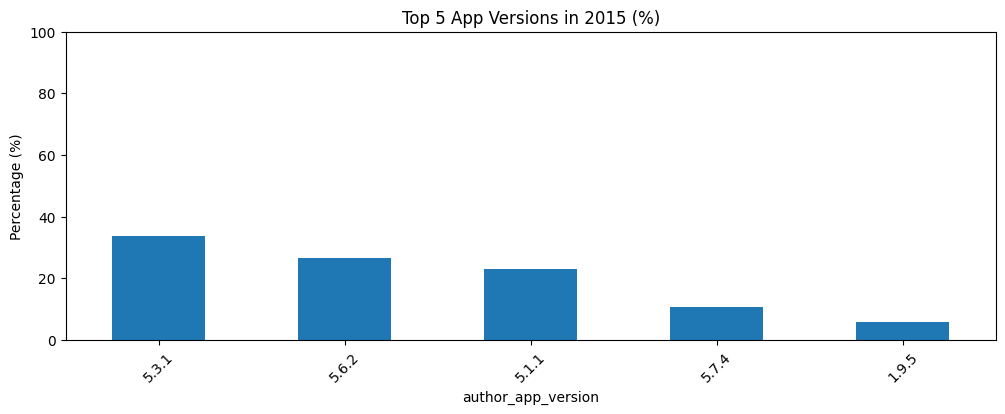

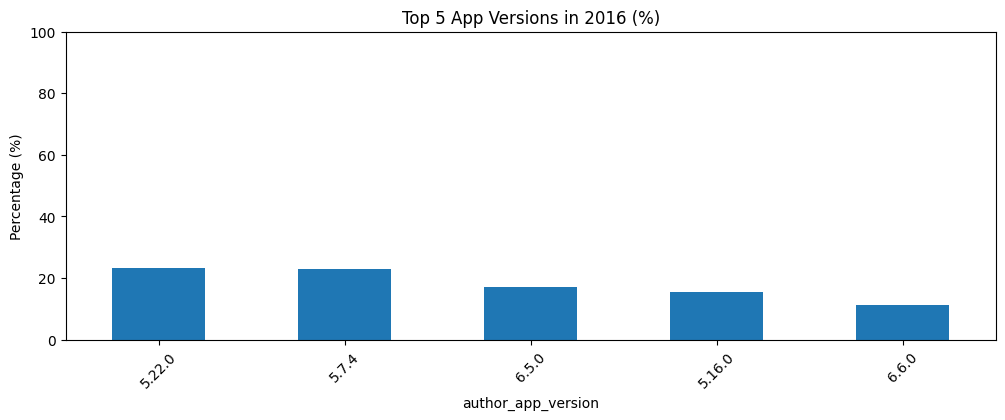

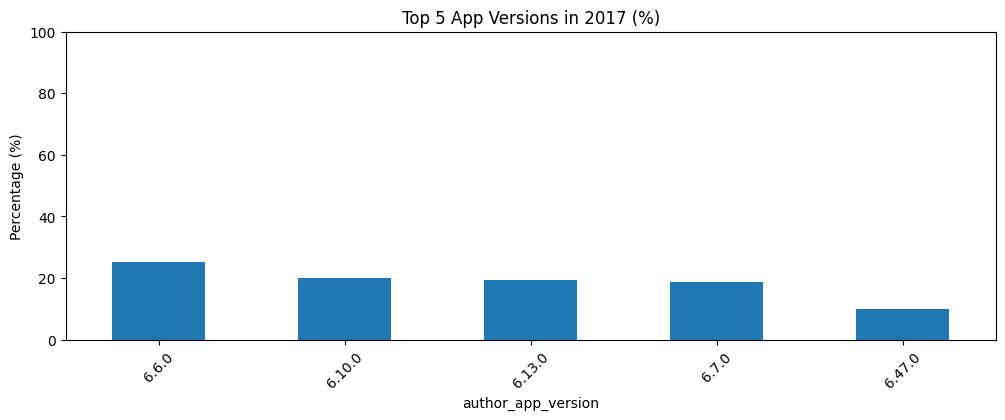

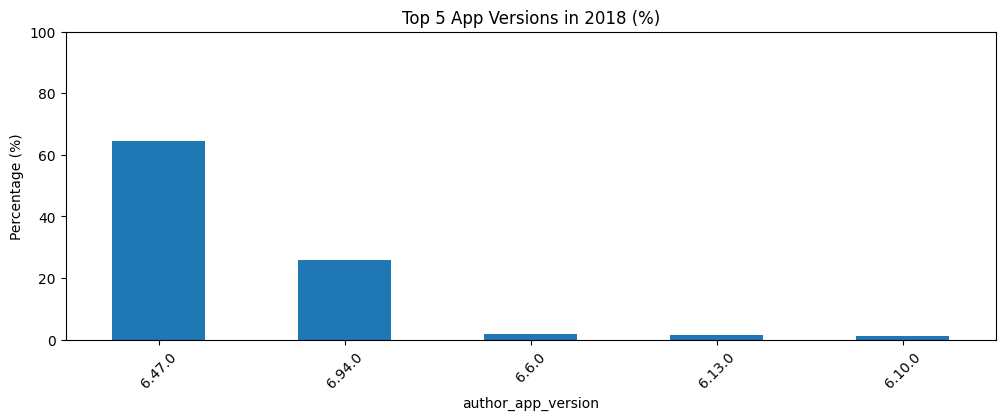

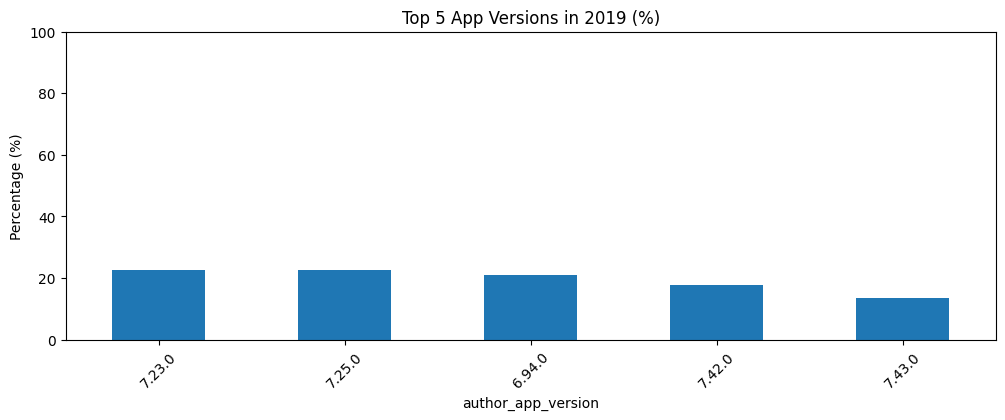

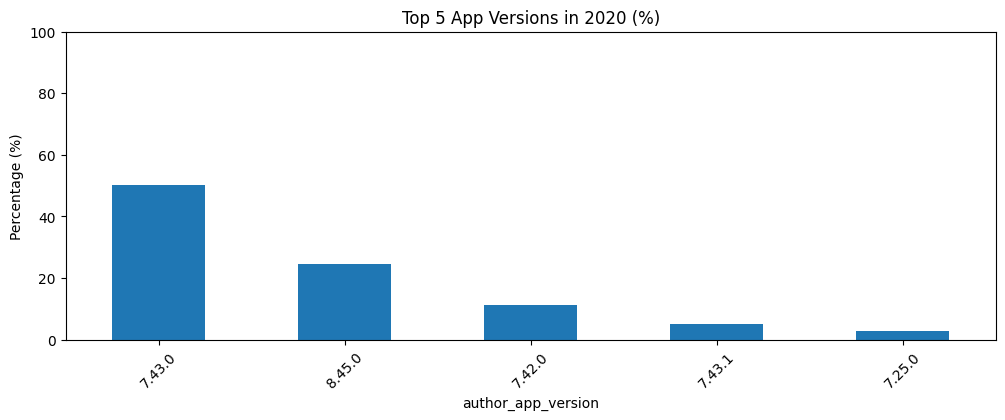

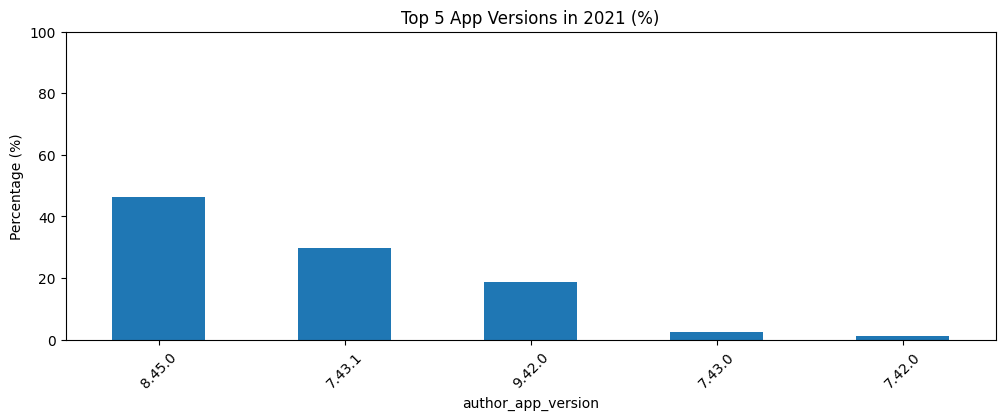

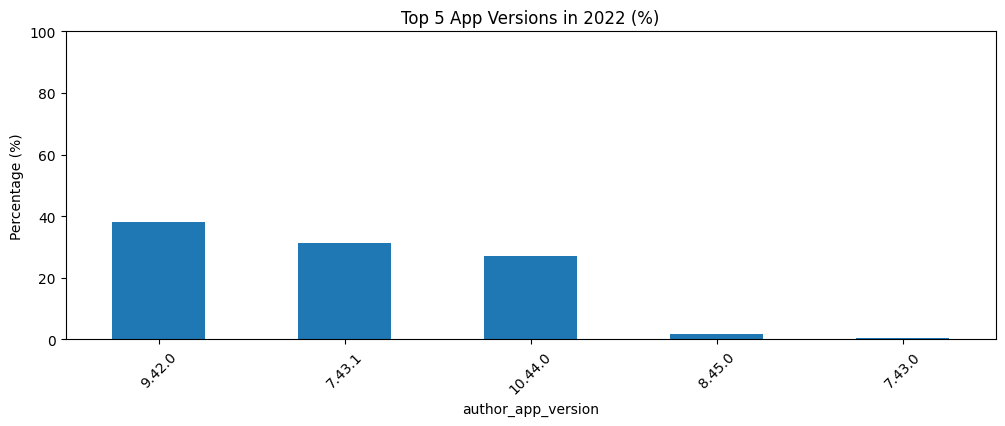

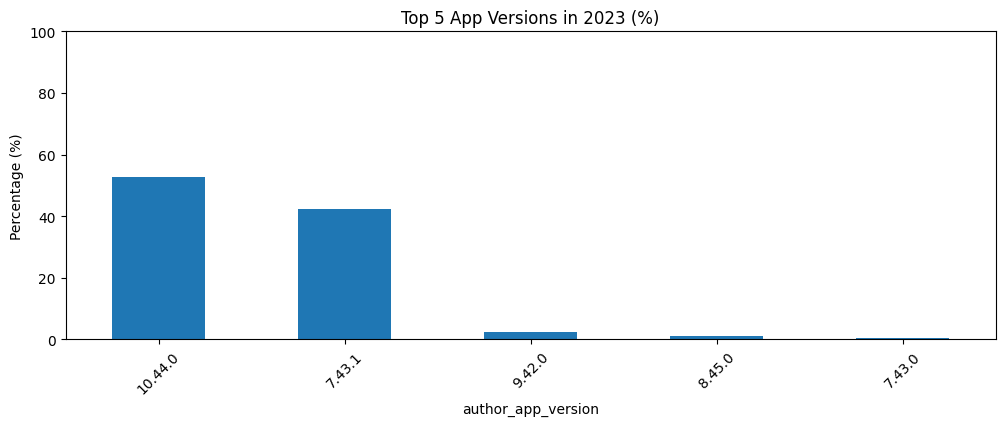

In [24]:

# Bar chart for TOP 5 app versions per YEAR
# =========================================================
for yr in sorted(df_top25["year"].dropna().unique()):
    plt.figure(figsize=(12,4))

    # Extract all versions for the year
    year_data = app_year_pct.loc[yr]

    # Get TOP 5 versions by percentage for that year
    year_top5 = year_data.sort_values(ascending=False).head(5)

    # Plot them
    year_top5.plot(kind='bar')
    plt.title(f"Top 5 App Versions in {yr} (%)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.ylim(0,100)
    plt.show()


# **APP VERSION + SENTIMENT + YEAR**

In [25]:
year_version_sentiment = pd.crosstab(
    [df_top25["year"], df_top25["author_app_version"]],
    df_top25["sentiment"],
    normalize="index"
) * 100

print(year_version_sentiment)


sentiment                 Negative    Neutral    Positive
year author_app_version                                  
2012 1.0.3                3.713715  11.654745   84.631540
     1.0.6                3.623325  12.096622   84.280053
2013 1.0.3                9.090909  12.648221   78.260870
     1.0.6                4.464286  11.607143   83.928571
     1.9.5                3.765690  12.372983   83.861327
...                            ...        ...         ...
2023 7.42.0               0.000000   0.000000  100.000000
     7.43.0               0.000000  21.052632   78.947368
     7.43.1               2.865469  21.612433   75.522098
     8.45.0              10.714286  19.642857   69.642857
     9.42.0               8.064516  15.322581   76.612903

[155 rows x 3 columns]


## **1) Overall Positive Experience Across Versions**

Across all years and app versions, positive sentiment stays consistently dominant, typically ranging from **75–85%.**

This indicates:

**strong user** **satisfaction**

**successful engagement**

**stable user trust**

**quality UI/UX experience over time**




# **2) Some versions show elevated negative sentiment**   

2023 — version 8.45.0:

**Negative: 10.71%**

**Neutral: 19.64%**

**Positive: 69.64%**


# **3) Certain versions appear extremely stable**

2023 — version 7.42.0:

Negative: 0%

Neutral: 0%

Positive: 100%


# **4) Actionable Recommendation**

We need to identify versions with above-average negative sentiment (e.g., 8.45.0 and 7.43.1) and analyze **review_text** in these buckets to detect specific pain-points — such as

**crash complaints,**

**UI frustrations,**

**recommendation dissatisfaction or login issues.**

In [26]:
issue_keywords = {
    "App Stability": ["crash", "crashes", "crashing", "bug", "bugs", "error", "errors", "issue", "issues", "broken", "fail"],
    "Ads & Sponsored Content": ["ad", "ads", "advertisement", "sponsored", "commercial", "promotion", "spam"],
    "Recommendations": ["recommend", "recommendation", "suggestions", "feed", "irrelevant", "not interested", "doesn't show", "unrelated"],
    "Login Issues": ["login", "log in", "sign in", "authentication", "password", "can't log", "cannot log"],
    "Performance": ["slow", "lag", "laggy", "freezes", "freezing", "stuck", "delay"],
}


In [27]:
def classify_issue(text):
    if not isinstance(text, str):
        return "Other"

    t = text.lower()

    for category, keywords in issue_keywords.items():
        for k in keywords:
            if k in t:
                return category

    return "Other"


In [28]:
neg_df = df[df["sentiment"]=="Negative"].copy()
neg_df["issue_type"] = neg_df["review_text"].apply(classify_issue)


In [29]:
issue_counts = neg_df["issue_type"].value_counts()
issue_counts


,count
issue_type,
Other,46686
Ads & Sponsored Content,25898
App Stability,7706
Performance,1996
Recommendations,1821
Login Issues,1655


In [30]:
issue_percent = (issue_counts / issue_counts.sum() * 100).round(2)
issue_percent.astype(str) + "%"



,count
issue_type,
Other,54.44%
Ads & Sponsored Content,30.2%
App Stability,8.99%
Performance,2.33%
Recommendations,2.12%
Login Issues,1.93%


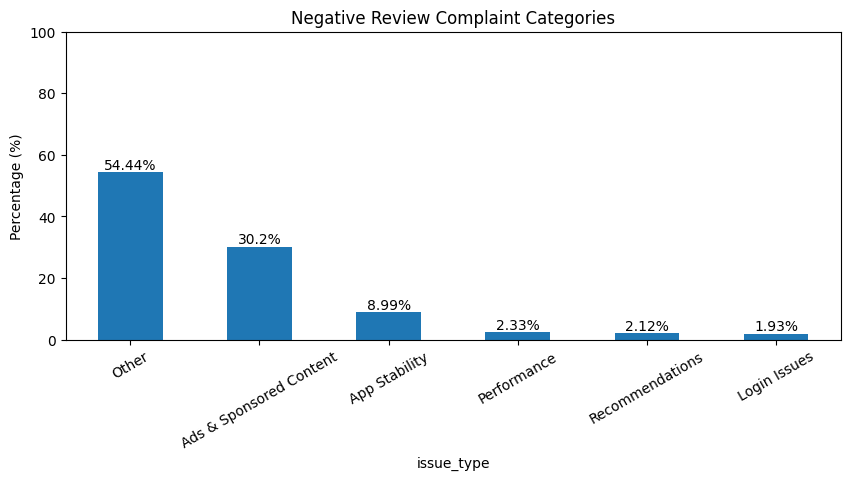

In [31]:
issue_percent.plot(kind='bar', figsize=(10,4))
plt.title("Negative Review Complaint Categories")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=30)
plt.ylim(0,100)

for i, v in enumerate(issue_percent):
    plt.text(i, v + 1, f"{v}%", ha='center')

plt.show()


**While the platform maintains generally positive user sentiment, analysis of negative reviews shows that ~30% of user frustration is tied to ad experience, and ~9% relates to app stability or crashes.**

**More than half of the complaints fall into miscellaneous categories, indicating a broad range of user pain-points that may require more granular categorization and review to better understand specific concerns.**

## <a name = "initexp10"> 1.10 Classify reviews by safety theme.




In [38]:
safety_keywords = {
    "Inappropriate Content": ["sexual", "nsfw", "nudity", "explicit", "porn", "onlyfans", "adult", "nude"],
    "Harassment or Bullying": ["harass", "harassment", "bully", "abuse", "threat", "threatening", "mean comments"],
    "Self-harm / Mental Distress": ["depressed", "suicidal", "kill myself", "self harm", "anxiety"],
    "Violence / Graphic Content": ["violent", "blood", "gore", "graphic", "abusive content", "shooting"],
    "Scams / Fraud / Deception": ["scam", "fraud", "fake account", "phishing", "stolen", "identity", "impersonation"],
    "Privacy Concerns": ["privacy", "tracking", "data stolen", "personal info", "violation"]
}


In [39]:
def classify_safety_issue(text):
    if not isinstance(text, str):
        return None
    t = text.lower()

    for category, keywords in safety_keywords.items():
        for k in keywords:
            if k in t:
                return category

    return None


In [34]:
df["safety_issue"] = df["review_text"].apply(classify_safety_issue)


In [35]:
safety_counts = df["safety_issue"].value_counts()
print(safety_counts)


safety_issue
Inappropriate Content          1899
Violence / Graphic Content      967
Privacy Concerns                830
Scams / Fraud / Deception       549
Harassment or Bullying          261
Self-harm / Mental Distress     167
Name: count, dtype: int64


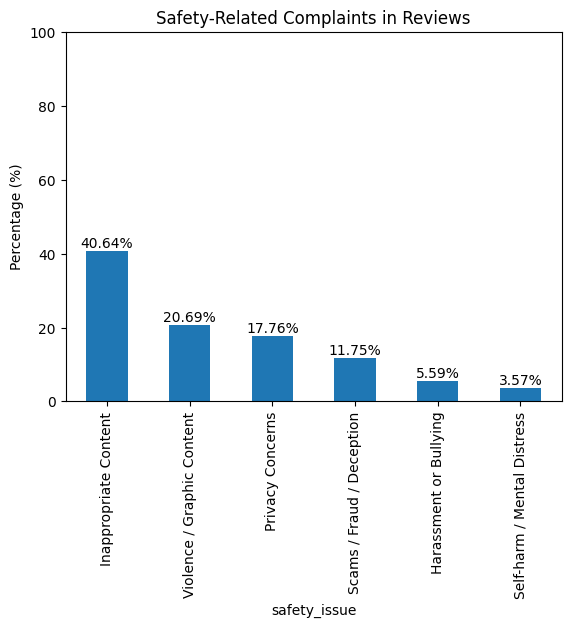

In [36]:
safety_percent = (safety_counts / safety_counts.sum() * 100).round(2)
safety_percent.plot(kind='bar')
plt.ylabel("Percentage (%)")
plt.title("Safety-Related Complaints in Reviews")
plt.ylim(0,100)

for i, v in enumerate(safety_percent):
    plt.text(i, v + 1, f"{v}%", ha='center')

plt.show()


**The majority of safety-related complaints involve exposure to inappropriate or explicit content, with additional concerns around violent material and privacy. Although harassment and self-harm reports are less frequent, they remain critical from a Trust & Safety perspective and require ongoing vigilance and responsive moderation.**

## <a name = "initexp11"> Summary

**Based on the analysis of approximately 1.3 million Pinterest app reviews, overall user sentiment is strongly positive (approx 80%), with a relatively small proportion expressing strong dissatisfaction (6–7%). Negative feedback primarily relates to ad intrusiveness and app reliability, while deeper safety-related concerns focus on exposure to inappropriate or explicit content, violent imagery, and privacy concerns. Temporal and app-version sentiment trends indicate specific release cycles associated with higher complaint volumes, suggesting opportunities for targeted remediation. These findings demonstrate that while user trust and satisfaction are generally high, enhancing content controls, improving moderation of explicit material, refining ad strategies, and proactively addressing detected safety risks will strengthen user experience and reinforce platform integrity.**

# **Download the dataset file for Tableau Visualization**

In [37]:
df.to_csv("pinterest_final_dataset.csv", index=False)
